# Introduction to PyTorch

This tutorial shows the basics of PyTorch library.

We design simple Neural Networks for classification task on MNIST dataset.

You're probably going to need PyTorch documentation:

https://pytorch.org/docs/stable/index.html

and tutorials:

https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html

In [ ]:
!mkdir data

1. PyTorch is based on tensor operations. First, let's try to use them:
- create simple python list with four values and convert it to PyTorch tensor
- create numpy array with random values and shape (1,3,7,7) and convert it to Pytorch tensor
- create PyTorch tensor with random values and shape (1,3,7,7) with preset seed
- create PyTorch tensor with linear space in range from -5 to 15 and reshape it to tensor with shape (1,3,7,7)
- create PyTorch tensor of zeros with shape (1,3,7,7)

For display use `print` function.

In [17]:
import torch
import numpy as np
from typing import Tuple
import tqdm
from tabulate import tabulate
python_list = [1, 2, 3, 4]
tensor_from_list = torch.tensor(python_list)
print(f"Tensor from list: {tensor_from_list}")

numpy_arr = np.random.rand(1, 3, 7, 7)
tensor_from_numpy = torch.tensor(numpy_arr)
print(f"Tensor from numpy arr: {tensor_from_numpy}")

# dzięki temu przy kazdym uruchomieniu otrzymujemy te same losowe wartości
random_tensor = torch.rand(1, 3, 7, 7)
torch.manual_seed(0) 
print(f"Random tensor with preset seed: {random_tensor}")


# linspace tworzy nam liniowe rozłoenie danych (czyli chyba ciąg? taka sama roznica miedzy kazdymi liczbami)
linear_tensor = torch.linspace(-5, 15, steps=1*3*7*7).reshape(1, 3, 7, 7)
print(linear_tensor)

zeros_tensor = torch.zeros(1, 3, 7, 7)
print(f"Zeros tensor: {zeros_tensor}")

Tensor from list: tensor([1, 2, 3, 4])
Tensor from numpy arr: tensor([[[[0.1979, 0.2089, 0.8812, 0.3688, 0.5101, 0.0525, 0.4303],
          [0.9911, 0.0207, 0.5338, 0.7258, 0.9917, 0.8546, 0.1344],
          [0.4611, 0.9622, 0.4394, 0.2708, 0.8185, 0.9220, 0.1635],
          [0.6040, 0.1079, 0.8381, 0.2752, 0.3549, 0.1486, 0.9634],
          [0.0252, 0.1644, 0.1698, 0.5441, 0.2444, 0.1428, 0.9955],
          [0.5414, 0.9531, 0.8055, 0.7594, 0.8380, 0.9566, 0.1384],
          [0.4404, 0.6970, 0.7797, 0.6291, 0.5225, 0.2466, 0.7973]],

         [[0.1731, 0.0968, 0.3959, 0.6689, 0.0241, 0.9399, 0.8844],
          [0.4737, 0.0414, 0.4566, 0.8066, 0.3761, 0.5983, 0.3666],
          [0.5807, 0.8480, 0.1096, 0.3851, 0.8597, 0.7061, 0.1032],
          [0.8467, 0.8615, 0.8638, 0.6549, 0.5167, 0.6238, 0.3705],
          [0.5182, 0.1182, 0.4048, 0.0111, 0.2754, 0.1509, 0.0785],
          [0.5646, 0.5618, 0.0799, 0.8472, 0.8155, 0.0692, 0.0155],
          [0.1041, 0.2831, 0.9905, 0.5570, 0.4696, 0

2. PyTorch allows applying GPU for computations.
Check if gpu (CUDA) is available and then use it as `device`, else use `'cpu'`. Then, move one of your tensors to selected device.

In [2]:
# gpu jest lepsze do wykonywania skomplikowanych obliczen dlatego chcielibysmy z tego skorzystac ale mam maca więc nie mogę
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# przenosimy nasz tensor na urządzenie które będzie korzystac z wczesniej zdefiniowanego gpu lub cpu
random_tensor = random_tensor.to(device)
print(f"Tensor on {device}: {random_tensor}")

Using device: cpu
Tensor on cpu: tensor([[[[7.0080e-01, 8.6437e-01, 7.5487e-01, 7.1401e-01, 4.8101e-01,
           4.3614e-01, 6.4462e-01],
          [9.5264e-01, 1.2725e-01, 2.3432e-01, 7.9959e-01, 5.4008e-01,
           8.4314e-02, 2.6639e-01],
          [7.7565e-02, 1.8192e-01, 6.4973e-01, 5.9840e-01, 5.7920e-01,
           5.0073e-02, 3.5495e-01],
          [4.1902e-05, 5.5996e-01, 9.1004e-01, 2.8843e-01, 2.7448e-01,
           1.8270e-01, 5.3634e-01],
          [2.0827e-01, 9.1346e-01, 3.7689e-01, 7.4214e-01, 3.2981e-01,
           2.3370e-01, 7.7565e-01],
          [7.7355e-01, 9.7310e-01, 6.6742e-01, 5.7325e-01, 6.4083e-01,
           7.8802e-01, 2.8502e-01],
          [4.1989e-01, 8.2637e-01, 3.2067e-01, 1.5849e-01, 6.3668e-01,
           8.8936e-01, 7.9497e-01]],

         [[6.8548e-01, 7.9268e-01, 5.1928e-01, 7.5358e-01, 9.9550e-01,
           8.8905e-01, 4.2463e-01],
          [1.7213e-01, 8.9372e-01, 1.1398e-01, 1.0622e-01, 8.0143e-01,
           8.8916e-01, 9.6725e-02],
  

3. To train a network, we need a dataset.

Please download `MNIST` dataset with `torchvision.dataset`.

For any kind of ML task, validation or testing is required.

So, create train and test datasets.

For train dataset apply also augmentation transforms, crop, translation and rotation.

For both apply ToTensor.

Next, pack datasets into `DataLoader`s with batch size of 64.
Use variables with names: `train_loader` and `test_loader`.

Next display sizes of datasets, shapes of elements and display a few images and their labels.

Finally, compare the number of objects in each class in both datasets.

In [3]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Compose, RandomCrop, RandomAffine
import matplotlib.pyplot as plt

# Compose łączy kilka transformacji w jedną sekwencję
# RandomCrop przycina obraz do rozmiaru 28x28 pikseli z losowym paddingiem do 4 pikseli (po to aby pozniej przycinac)
# RandomAffine losowa rotacja obrazu o maks 15 stopni i translacja czyli przesuniecie o maks 10% szerokosci i wysokosci obrazu
# ToTensor konwertuje na tensor bo tak chce torch
train_transform = Compose([
    RandomCrop(28, padding=4),
    RandomAffine(degrees=15, translate=(0.1, 0.1)),
    ToTensor()
])

# Tu nie sotsujemy augmentacji zeby wyniki byly porównywalne
test_transform = Compose([
    ToTensor()
])

try:
    train_dataset = datasets.MNIST(
        root="./data", train=True, download=True, transform=train_transform
    )
    test_dataset = datasets.MNIST(
        root="./data", train=False, download=True, transform=test_transform
    )
except Exception as e:
    print(f"Failed to download MNIST dataset: {e}")

# DataLoader klasa ułatwia iteracji po danych w partiach
# batch_size liczba probek w jednej partii
# shuffle losowe mieszanie danych w kazdej epoce 
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

print(f"Train dataset size: {len(train_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")

Train dataset size: 60000
Test dataset size: 10000


Batch shape: torch.Size([64, 1, 28, 28])
Labels shape: torch.Size([64])


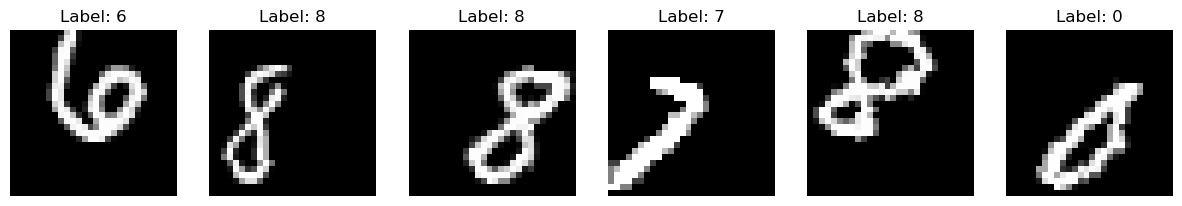

Train class counts: tensor([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949])
Test class counts: tensor([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009])


In [4]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
print(f"Batch shape: {images.size()}") # [64, 1, 28, 28] - 64 liczba obrazow - 1 liczba kanalow - 28x28 wymiary kazdego obrazu
print(f"Labels shape: {labels.size()}") # 64 etykiety

fig, axes = plt.subplots(1, 6, figsize=(15, 4))
for i in range(6):
    ax = axes[i]
    ax.imshow(images[i].numpy().squeeze(), cmap="gray")
    ax.set_title(f"Label: {labels[i].item()}")
    ax.axis("off")
plt.show()

train_labels = [label for _, label in train_loader.dataset]
test_labels = [label for _, label in test_loader.dataset]

# zlicza liczbę wystapien kazdej klasy
train_class_counts = torch.tensor(train_labels).bincount()
test_class_counts = torch.tensor(test_labels).bincount()

print(f"Train class counts: {train_class_counts}")
print(f"Test class counts: {test_class_counts}")

In [20]:
import matplotlib.pyplot as plt


def draw_loss_test(epochs, history):
    loss_train = history["loss_train"]
    loss_test = history["loss_test"]
    acc_train = history["acc_train"]
    acc_test = history["acc_test"]

    loss_train_shape = len(loss_train)
    loss_test_shape = len(loss_test)
    acc_train_shape = len(acc_train)
    acc_test_shape = len(acc_test)

    if (
        loss_train_shape != loss_test_shape
        or acc_train_shape != acc_test_shape
    ):
        raise ValueError(
            f"Different number of epochs for train and test loss: {loss_train_shape} != {loss_test_shape} or train and test accuracy: {acc_train_shape} != {acc_test_shape}"
        )

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history["loss_train"], label="Train loss")
    plt.plot(epochs, history["loss_test"], label="Test loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, history["acc_train"], label="Train accuracy")
    plt.plot(epochs, history["acc_test"], label="Test accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.show()

5. We have our dataset ready, let's create model for classification task.

Please define class `MLP` as Multi Layer Perceptron with two hidden fully connected layers with bias.

Class must inherit from `torch.nn.Module`.

Apply following configuration:

- first layer with 512 neurons,
- second layer with 512 neurons,
- output layer adjusted to the size of classification problem.

For `__init__` method add parameters: input_shape and output_size.

Don't forget about nonlinearities!

For hidden layers you can use `ReLU` module from `torch.nn`.

For output apply softmax function.

Define layer-by-layer network processing in `forward` method with argument as a network.

Help: input tensor - batch of images with shape (batch_size, channels, height, width) - (channels = 1 for gray scale images).

Instantiate model as `net` object.

Layers:
- `torch.nn.Sequential`
    - layer allows for forward pass through
        component layers:
        ```
        t_in: Tensor
        t_out: Tensor = t_in
        for L in layers:
            t_out = L(t_out)
        return t_out
        
- `torch.nn.Flatten`
    - layer makes input tensor flattened:
    - (bs, CH, H, W) -> (bs, CH * H * W)
    
- `torch.nn.Linear(ch_in, ch_out, bias)`
    - 'classical' neural network layer - fully connected
    - ch_in is a number of input channels
    - ch_out is a number of output channels / number of neurons in layer
    - bias - whether to use bias parameter
    - for Linear layers it is recommended to use flatten layer before, when input has more than 2 dimensions
    - operation implemented by this layer is a vector / matrix multiplication
        - `y = W x v` or `y = W x v + b`
        - W has a shape [ch_out, ch_in]
        - v has a shape [ch_in]
        - b has a shape [ch_in]
        - y has a shape [ch_out]

- `torch.nn.ReLU`
    - layer applies ReLU function on input tensor
    
- `torch.nn.Softmax(dim)`
    - layer applies softmax function on input tensor
    - `dim` - dimension over which function is calculated


For the formulas of activation function go to [torch documentation](https://pytorch.org/docs/stable/index.html).

In [6]:
import torch.nn as nn


# klasa definiująca wielowarstwowy perceptron
class MLP(nn.Module):

    def __init__(self, input_shape, output_size) -> None:
        super(MLP, self).__init__()
        # Sequential to kontener ktory pozwala na zdefiniowanie listy warstw 
        self.model = nn.Sequential(
            # Flatten warstwa splaszczajaca tensor z (batch_size, channels, height, width) na (batch_size, channels * heigth * width)
            # np. obrazki 28x28 maja (batch_size, 1, 28, 28) i splaszczy na (batch_size, 784) bo Linear chce danych w takim formacie
            # 784 to liczba cech
            nn.Flatten(),
            # Linear y = Wx + b (W macierz wag, x dane wejsciowe, b wektor biasu)
            # in_features - liczba wejsciowych cech, out_features - liczba wyjsciowych cech, bias - czy uzywac
            nn.Linear(input_shape[0] * input_shape[1] * input_shape[2], 512, bias=True),
            # ReLU f(x) = max(0, x)
            # warstwa aktywacji - wprowadza nieliniowosc modelu (bez tego uczy sie tylko funckji liniowych)
            # pozwala sieci na uczenie sie bardziej zlozonych funkcji
            nn.ReLU(),
            nn.Linear(512, 512, bias=True),
            nn.ReLU(),
            # ostatnia warstwa przeksztalca dane wyjsciowe na dane o rozmiarze rownym liczbie klas
            nn.Linear(512, output_size, bias=True),
            # Softmax softmax(x_i) = exp(x_i) / sum(exp(x_j))
            # warstwa aktywacji - przeksztalca wyjscia w pradopodobienstwa ktore sumuja sie do 1
            # dim=1 oznacza ze softmax jest stosowany wzdluz osi klas  (dla kazdego przykladu w partii)
            # czesto nie uzywamy tego gdy korzystamy z CrossEntroyLoss bo ono ma w sobie juz LogSoftmax i NLLLoss
            nn.Softmax(dim=1)
        )

    # dfiniuje przeplyw danych przez siec, x: tensor wejsciowy (batch_size, channels, height, width)
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.model(x)

# obrazek w skali szarosci o rozmairze 28x28 pikseli
input_shape = (1, 28, 28)
# liczb klas do klasyfikacji np. 10 do liczb od 0 do 9
output_size = 10

net = MLP(input_shape, output_size)
net = net.to(device)

net2 = MLP(input_shape, output_size)
net2 = net2.to(device)

6. To train network we need to know 'how good or bad' results it gives.
Please, instantiate `torch.nn.CrossEntropyLoss` as `loss_fcn`.

In [7]:
# informuje jak dobrze model przewiduje prawdziwe klasy
loss_fn = nn.CrossEntropyLoss()

7. To score network define accuracy metric.
For network output you need to decide what is the final network answer. For clasification we can assume, that the final answer is the class with highest probability (`argmax`).

`torch.no_grad()` prevents gradient requirement for computations inside method.

In [8]:
from abc import ABC, abstractmethod
from typing import Any


class BaseMetric(ABC):

    @abstractmethod
    def __call__(self, y_pred, y_ref) -> Any:
        raise NotImplementedError()


class AccuracyMetric(BaseMetric):

    def __init__(self) -> None:
        pass

    @torch.no_grad()
    def __call__(self, y_pred: torch.Tensor, y_ref: torch.Tensor) -> torch.Tensor:
        """
        :param y_pred: tensor of shape (batch_size, num_of_classes) type float
        :param y_ref: tensor with shape (batch_size,) and type Long
        :return: scalar tensor with accuracy metric for batch
        """
        predicted_classes = torch.argmax(y_pred, dim=1) # zwroci indeks ktory ma najwieksza wartosc
        correct_predictions = (predicted_classes == y_ref).float() # porównanie z prawdziwymi etykietami
        score: torch.Tensor = correct_predictions.mean() # srednia z poprawnych predykcji czyli dokładność

        return score


metric = AccuracyMetric()

8. To change network parameters, we need an optimizer object.
Instantiate `torch.optim.SGD` (with `net`work parameters) as `optimizer`.
Use learning rate = 0.001.

In [9]:
# Stochastic Gradient Descent algorytm do optymalizacji (minimzlizacji funkcji straty)
# parameters to wagi i biasy, lr kork o jaki będą aktualizaowane parametry sieci w kazdej iteracji
optimizer = torch.optim.SGD(net.parameters(), lr=0.01) 
optimizer2 = torch.optim.SGD(net2.parameters(), lr=0.01)

9. Now define training / testing function:

In [24]:
def train_or_test(
    model,  # sieć neuronowa która trenujemy lub testujemy
    data_generator,  # generator danych, ktory dostarcza dane wejsciowe i etykiety w partiach (batchach)
    criterion,  # funkcja straty, ktora oblicza roznice miedzy predykcjami modelu, a prawdziwymi etykietami
    metric: BaseMetric,  # funkcja metryki, ktora oblicza dokladnosc predykcji modelu
    mode: str = "test",
    optimizer: torch.optim.Optimizer = None,  # optymalizator - aktualizauje parametry modelu podczas treningu
    update_period: int = None,  # Okres aktualizacji, określa co ile batchy mają być aktualizowane parametry modelu.
    device=torch.device("cpu"),
) -> Tuple[torch.nn.Module, float, float]:

    # change model mode to train or test
    if mode == 'train':
        model.train()
    elif mode == 'test':
        model.eval()
    else:
        raise RuntimeError(f"Unsupported mode: {mode}. Use 'train' or 'test'.")

    # move model to device
    model.to(device)

    # reset model parameters' gradients with optimizer
    if mode == 'train':
        optimizer.zero_grad()

    total_loss = 0.0 # suma strat dla wszystkich batchy
    total_accuracy = 0.0 # suma dokladnosci dla wszystkich batchy
    samples_num = 0 # liczba probek przetworzonych przez model

    for i, (X, y) in enumerate(tqdm.tqdm(data_generator)):
        # convert tensors to device
        X, y = X.to(device), y.to(device)

        # process by network
        y_pred = model(X)

        # calculate loss
        loss = criterion(y_pred, y)

        # designate gradient based on loss
        if mode == 'train':
            loss.backward()

        if mode == 'train' and (i+1) % update_period == 0:
            # update parameters with optimizer
            optimizer.step()
            optimizer.zero_grad()

        # calculate accuracy
        accuracy = metric(y_pred, y)

        total_loss += loss.item() * y_pred.shape[0] # y_pred.shape[0] to rozmair batcha (liczba probek w batchu)
        total_accuracy += accuracy.item() * y_pred.shape[0]
        samples_num += y_pred.shape[0]

    if samples_num == 0:
        return model, 0.0, 0.0

    return model, total_loss / samples_num, total_accuracy / samples_num

In [ ]:
net_preview, loss_preview, acc_preview = train_or_test(
    net,
    train_loader,
    loss_fn, metric,
    'train', 
    update_period=5,
    optimizer=optimizer,
    device=device,
)

10. Prepare training loop function (over epochs):
- adjust max number of epochs to achieve satisfactory results,
- **EXTENSION EXERCISE** implement stopping training when accuracy exceeds certain value.

In [25]:
def training(model,
             train_loader,
             test_loader,
             loss_fn,
             metric,
             optimizer,
             update_period,
             epoch_max,
             device,
             early_stopping_accuracy=None):
    loss_train = []
    loss_test = []
    acc_train = []
    acc_test = []

    for e in range(epoch_max):
        print(f"\nEpoka: {e + 1}/{epoch_max}")

        model.train()
        total_loss_train = 0.0
        total_acc_train = 0.0
        samples_num_train = 0

        for i, (X, y) in enumerate(tqdm.tqdm(train_loader, colour="red", ncols=100)):
            X, y = X.to(device), y.to(device)

            y_pred = model(X)

            loss = loss_fn(y_pred, y)
            loss.backward()

            if (i + 1) % update_period == 0:
                optimizer.step()
                optimizer.zero_grad()

            accuracy = metric(y_pred, y)
            batch_size = y.size(0)
            total_loss_train += loss.item() * batch_size
            total_acc_train += accuracy.item() * batch_size
            samples_num_train += batch_size

        epoch_loss_train = total_loss_train / samples_num_train
        epoch_acc_train = total_acc_train / samples_num_train
        loss_train.append(epoch_loss_train)
        acc_train.append(epoch_acc_train)

        print(
            f"Train loss: {epoch_loss_train:.4f}\nTrain accuracy: {epoch_acc_train:.4f}"
        )

        model.eval()
        total_loss_test = 0.0
        total_acc_test = 0.0
        samples_num_test = 0

        with torch.no_grad():
            for X, y in tqdm.tqdm(test_loader, colour='green', smoothing=0.3, ncols=100):
                X, y = X.to(device), y.to(device)

                y_pred = model(X)

                loss = loss_fn(y_pred, y)
                accuracy = metric(y_pred, y)

                batch_size = y.size(0)
                total_loss_test += loss.item() * batch_size
                total_acc_test += accuracy.item() * batch_size
                samples_num_test += batch_size

        epoch_loss_test = total_loss_test / samples_num_test
        epoch_acc_test = total_acc_test / samples_num_test
        loss_test.append(epoch_loss_test)
        acc_test.append(epoch_acc_test)

        print(f"Test loss: {epoch_loss_test:.4f}\nTest accuracy: {epoch_acc_test:.4f}")

        if (early_stopping_accuracy and epoch_acc_train >= early_stopping_accuracy):
            print(f"Training accuracy of {epoch_acc_train:.4f} achieved, stopping training.")
            break

    return model, {'loss_train': loss_train,
                   'acc_train': acc_train,
                   'loss_test': loss_test,
                   'acc_test': acc_test}

In [10]:
def train_one_epoch(
    model, train_loader, loss_fn, metric, optimizer, update_period, device
):
    model.train()
    total_loss_train = 0.0
    total_acc_train = 0.0
    samples_num_train = 0

    with tqdm.tqdm(
        train_loader, colour="red", ncols=100
    ) as t:
        for i, (X, y) in enumerate(t):
            X, y = X.to(device), y.to(device)

            y_pred = model(X)
            loss = loss_fn(y_pred, y)
            loss.backward()

            if (i + 1) % update_period == 0:
                optimizer.step()
                optimizer.zero_grad()

            accuracy = metric(y_pred, y)
            batch_size = y.size(0)
            total_loss_train += loss.item() * batch_size
            total_acc_train += accuracy.item() * batch_size
            samples_num_train += batch_size

            current_loss = total_loss_train / samples_num_train
            current_acc = total_acc_train / samples_num_train

            t.set_postfix(loss=f'{current_loss:.4f}', accuracy=f'{current_acc:.4f}')

    epoch_loss_train = total_loss_train / samples_num_train
    epoch_acc_train = total_acc_train / samples_num_train

    return epoch_loss_train, epoch_acc_train


def test_one_epoch(model, test_loader, loss_fn, metric, device):
    model.eval()
    total_loss_test = 0.0
    total_acc_test = 0.0
    samples_num_test = 0

    with torch.no_grad():
        with tqdm.tqdm(
            test_loader, colour="green", ncols=100
        ) as t:
            for X, y in t:
                X, y = X.to(device), y.to(device)

                y_pred = model(X)
                loss = loss_fn(y_pred, y)
                accuracy = metric(y_pred, y)

                batch_size = y.size(0)
                total_loss_test += loss.item() * batch_size
                total_acc_test += accuracy.item() * batch_size
                samples_num_test += batch_size

                current_loss = total_loss_test / samples_num_test
                current_acc = total_acc_test / samples_num_test

                t.set_postfix(loss=f'{current_loss:.4f}', accuracy=f'{current_acc:.4f}')

    epoch_loss_test = total_loss_test / samples_num_test
    epoch_acc_test = total_acc_test / samples_num_test

    return epoch_loss_test, epoch_acc_test


def test_or_train(
    model,
    train_loader,
    test_loader,
    loss_fn,
    metric,
    optimizer,
    update_period,
    epoch_max,
    device,
    mode="train",
    early_stopping_accuracy=None,
):
    loss_train = []
    loss_test = []
    acc_train = []
    acc_test = []

    for e in range(epoch_max):
        print(f"Epoch: {e + 1}/{epoch_max}")

        if mode in ["train", "both"]:
            epoch_loss_train, epoch_acc_train = train_one_epoch(
                model,
                train_loader,
                loss_fn,
                metric,
                optimizer,
                update_period,
                device,
            )
            loss_train.append(epoch_loss_train)
            acc_train.append(epoch_acc_train)

        if mode in ["test", "both"]:
            epoch_loss_test, epoch_acc_test = test_one_epoch(
                model, test_loader, loss_fn, metric, device
            )
            loss_test.append(epoch_loss_test)
            acc_test.append(epoch_acc_test)

        if (
            early_stopping_accuracy
            and epoch_acc_train >= early_stopping_accuracy
        ):
            print(
                f"Training accuracy of {epoch_acc_train:.4f} achieved, stopping training."
            )
            break

    return model, {
        "loss_train": loss_train,
        "acc_train": acc_train,
        "loss_test": loss_test,
        "acc_test": acc_test,
    }

11. Display training history.

In [13]:
net2, history2 = test_or_train(
    net2,
    train_loader,
    test_loader,
    loss_fn,
    metric,
    optimizer2,
    update_period=5,
    epoch_max=100,
    device=device,
    mode="both",
    early_stopping_accuracy=0.98,
)

Epoch: 1/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 500.36it/s, accuracy=0.1276, loss=2.3016]


Epoch: 2/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 478.90it/s, accuracy=0.1411, loss=2.3004]


Epoch: 3/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 510.15it/s, accuracy=0.1157, loss=2.2990]


Epoch: 4/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 501.29it/s, accuracy=0.0997, loss=2.2971]


Epoch: 5/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 484.43it/s, accuracy=0.0980, loss=2.2940]


Epoch: 6/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 488.73it/s, accuracy=0.0980, loss=2.2872]


Epoch: 7/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 495.19it/s, accuracy=0.0980, loss=2.2727]


Epoch: 8/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 496.70it/s, accuracy=0.1703, loss=2.2576]


Epoch: 9/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 494.45it/s, accuracy=0.2138, loss=2.2443]


Epoch: 10/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 495.92it/s, accuracy=0.2413, loss=2.2335]


Epoch: 11/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 490.07it/s, accuracy=0.2526, loss=2.2246]


Epoch: 12/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 376.70it/s, accuracy=0.2598, loss=2.2138]


Epoch: 13/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 474.79it/s, accuracy=0.2620, loss=2.1975]


Epoch: 14/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 374.21it/s, accuracy=0.2765, loss=2.1702]


Epoch: 15/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 485.69it/s, accuracy=0.3091, loss=2.1412]


Epoch: 16/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 496.47it/s, accuracy=0.3618, loss=2.1098]


Epoch: 17/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 485.76it/s, accuracy=0.4212, loss=2.0757]


Epoch: 18/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 430.39it/s, accuracy=0.4899, loss=2.0368]


Epoch: 19/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 451.10it/s, accuracy=0.5266, loss=1.9997]


Epoch: 20/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 428.73it/s, accuracy=0.5783, loss=1.9622]


Epoch: 21/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 443.94it/s, accuracy=0.5879, loss=1.9383]


Epoch: 22/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 530.34it/s, accuracy=0.5999, loss=1.9165]


Epoch: 23/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 475.98it/s, accuracy=0.6068, loss=1.8986]


Epoch: 24/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 486.52it/s, accuracy=0.6091, loss=1.8889]


Epoch: 25/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 461.56it/s, accuracy=0.6118, loss=1.8812]


Epoch: 26/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 477.50it/s, accuracy=0.6147, loss=1.8743]


Epoch: 27/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 460.50it/s, accuracy=0.6169, loss=1.8663]


Epoch: 28/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 473.61it/s, accuracy=0.6262, loss=1.8528]


Epoch: 29/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 462.92it/s, accuracy=0.6718, loss=1.8284]


Epoch: 30/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 516.37it/s, accuracy=0.6953, loss=1.8108]


Epoch: 31/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 391.81it/s, accuracy=0.7032, loss=1.7988]


Epoch: 32/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 464.33it/s, accuracy=0.7100, loss=1.7882]


Epoch: 33/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 410.10it/s, accuracy=0.7089, loss=1.7856]


Epoch: 34/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 475.99it/s, accuracy=0.7160, loss=1.7776]


Epoch: 35/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 492.62it/s, accuracy=0.7181, loss=1.7746]


Epoch: 36/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 426.56it/s, accuracy=0.7189, loss=1.7705]


Epoch: 37/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 442.01it/s, accuracy=0.7217, loss=1.7678]


Epoch: 38/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 439.42it/s, accuracy=0.7264, loss=1.7619]


Epoch: 39/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 442.62it/s, accuracy=0.7300, loss=1.7579]


Epoch: 40/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 444.47it/s, accuracy=0.7351, loss=1.7533]


Epoch: 41/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 472.68it/s, accuracy=0.7398, loss=1.7473]


Epoch: 42/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 463.34it/s, accuracy=0.7371, loss=1.7479]


Epoch: 43/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 471.25it/s, accuracy=0.7438, loss=1.7419]


Epoch: 44/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 456.62it/s, accuracy=0.7471, loss=1.7305]


Epoch: 45/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 461.05it/s, accuracy=0.8135, loss=1.7036]


Epoch: 46/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 470.18it/s, accuracy=0.8199, loss=1.6927]


Epoch: 47/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 469.21it/s, accuracy=0.8174, loss=1.6875]


Epoch: 48/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 459.38it/s, accuracy=0.8216, loss=1.6799]


Epoch: 49/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 435.21it/s, accuracy=0.8267, loss=1.6721]


Epoch: 50/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 436.39it/s, accuracy=0.8298, loss=1.6679]


Epoch: 51/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 428.96it/s, accuracy=0.8304, loss=1.6629]


Epoch: 52/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 439.41it/s, accuracy=0.8328, loss=1.6579]


Epoch: 53/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 427.10it/s, accuracy=0.8369, loss=1.6539]


Epoch: 54/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 470.92it/s, accuracy=0.8331, loss=1.6543]


Epoch: 55/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 472.80it/s, accuracy=0.8373, loss=1.6493]


Epoch: 56/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 476.44it/s, accuracy=0.8382, loss=1.6452]


Epoch: 57/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 464.09it/s, accuracy=0.8420, loss=1.6401]


Epoch: 58/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 460.41it/s, accuracy=0.8429, loss=1.6396]


Epoch: 59/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 469.92it/s, accuracy=0.8433, loss=1.6384]


Epoch: 60/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 469.44it/s, accuracy=0.8466, loss=1.6348]


Epoch: 61/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 471.72it/s, accuracy=0.8460, loss=1.6335]


Epoch: 62/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 463.57it/s, accuracy=0.8462, loss=1.6314]


Epoch: 63/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 466.09it/s, accuracy=0.8495, loss=1.6298]


Epoch: 64/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 462.45it/s, accuracy=0.8511, loss=1.6280]


Epoch: 65/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 469.05it/s, accuracy=0.8513, loss=1.6257]


Epoch: 66/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 474.32it/s, accuracy=0.8479, loss=1.6271]


Epoch: 67/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 467.79it/s, accuracy=0.8539, loss=1.6220]


Epoch: 68/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 474.30it/s, accuracy=0.8550, loss=1.6210]


Epoch: 69/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 465.09it/s, accuracy=0.8547, loss=1.6208]


Epoch: 70/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 469.79it/s, accuracy=0.8556, loss=1.6193]


Epoch: 71/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 449.96it/s, accuracy=0.8575, loss=1.6168]


Epoch: 72/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 467.66it/s, accuracy=0.8570, loss=1.6162]


Epoch: 73/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 439.08it/s, accuracy=0.8579, loss=1.6146]


Epoch: 74/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 429.35it/s, accuracy=0.8573, loss=1.6150]


Epoch: 75/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 432.93it/s, accuracy=0.8596, loss=1.6129]


Epoch: 76/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 457.26it/s, accuracy=0.8591, loss=1.6129]


Epoch: 77/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 468.97it/s, accuracy=0.8628, loss=1.6109]


Epoch: 78/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 420.09it/s, accuracy=0.8612, loss=1.6099]


Epoch: 79/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 467.70it/s, accuracy=0.8607, loss=1.6113]


Epoch: 80/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 472.07it/s, accuracy=0.8644, loss=1.6083]


Epoch: 81/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 456.24it/s, accuracy=0.8623, loss=1.6084]


Epoch: 82/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 470.32it/s, accuracy=0.8609, loss=1.6098]


Epoch: 83/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 468.85it/s, accuracy=0.8620, loss=1.6078]


Epoch: 84/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 472.73it/s, accuracy=0.8627, loss=1.6068]


Epoch: 85/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 455.30it/s, accuracy=0.8629, loss=1.6063]


Epoch: 86/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 469.48it/s, accuracy=0.8643, loss=1.6045]


Epoch: 87/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 461.51it/s, accuracy=0.8647, loss=1.6048]


Epoch: 88/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 469.32it/s, accuracy=0.8653, loss=1.6030]


Epoch: 89/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 466.72it/s, accuracy=0.8653, loss=1.6028]


Epoch: 90/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 471.74it/s, accuracy=0.8652, loss=1.6029]


Epoch: 91/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 471.59it/s, accuracy=0.8648, loss=1.6020]


Epoch: 92/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 472.59it/s, accuracy=0.8667, loss=1.6009]


Epoch: 93/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 461.90it/s, accuracy=0.8674, loss=1.5998]


Epoch: 94/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 458.80it/s, accuracy=0.8663, loss=1.6014]


Epoch: 95/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 390.59it/s, accuracy=0.8659, loss=1.6007]


Epoch: 96/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 474.41it/s, accuracy=0.8681, loss=1.5997]


Epoch: 97/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 472.48it/s, accuracy=0.8677, loss=1.5985]


Epoch: 98/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 447.67it/s, accuracy=0.8668, loss=1.5986]


Epoch: 99/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 469.84it/s, accuracy=0.8691, loss=1.5975]


Epoch: 100/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 475.05it/s, accuracy=0.8660, loss=1.6026]


In [21]:
headers = history2.keys()
rows = zip(*history2.values())
print(tabulate(rows, headers=headers, tablefmt="pretty"))

+--------------------+---------------------+--------------------+----------+
|     loss_train     |      acc_train      |     loss_test      | acc_test |
+--------------------+---------------------+--------------------+----------+
| 2.3023917994181313 | 0.11323333333333334 | 2.3015937885284425 |  0.1276  |
| 2.301779421488444  | 0.12786666666666666 | 2.3004300525665284 |  0.1411  |
| 2.301105199686686  | 0.12621666666666667 | 2.299012487792969  |  0.1157  |
| 2.300234745279948  | 0.10966666666666666 | 2.297085223007202  |  0.0997  |
| 2.2989735811869303 |       0.0999        | 2.2939566635131836 |  0.098   |
| 2.2967103847503663 | 0.09873333333333334 | 2.2872416290283204 |  0.098   |
| 2.291719249725342  | 0.09871666666666666 | 2.2726911727905272 |  0.098   |
| 2.2843660423278807 | 0.10476666666666666 | 2.2576027240753174 |  0.1703  |
| 2.277094981002808  | 0.14411666666666667 | 2.2443132095336913 |  0.2138  |
| 2.269759626261393  | 0.17028333333333334 | 2.233527021026611  |  0.2413  |

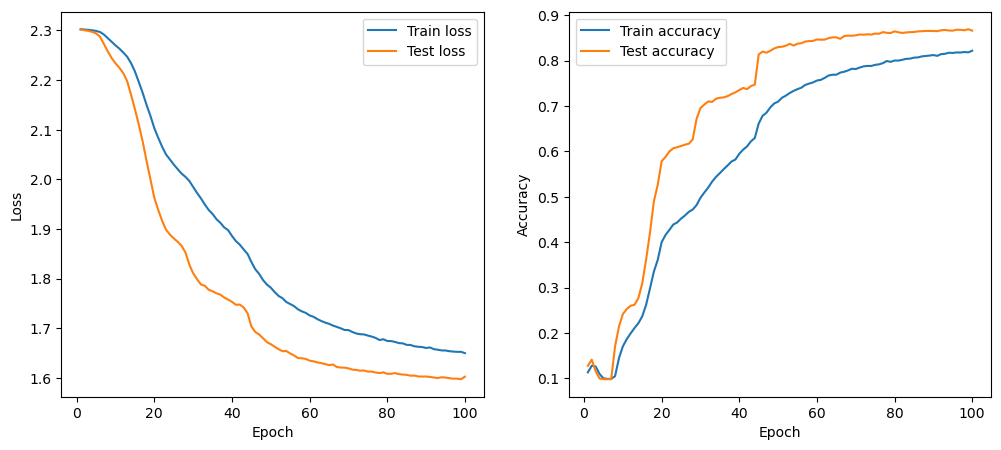

In [22]:
epochs = range(1, len(history2["loss_train"]) + 1)
draw_loss_test(epochs, history2)

In [ ]:
net, history = training(
    net,
    train_loader,
    test_loader,
    loss_fn,
    metric,
    optimizer,
    update_period=5,
    epoch_max=100,
    device=device,
    early_stopping_accuracy=0.98
)

In [27]:
headers = history.keys()
rows = zip(*history.values())
print(tabulate(rows, headers=headers, tablefmt='pretty'))

+--------------------+---------------------+--------------------+----------+
|     loss_train     |      acc_train      |     loss_test      | acc_test |
+--------------------+---------------------+--------------------+----------+
| 2.302253891372681  | 0.11513333333333334 | 2.3015244480133057 |  0.1905  |
| 2.3015840198516844 |       0.1659        | 2.300276218032837  |  0.2611  |
| 2.300844240442912  | 0.16923333333333335 | 2.2987437141418456 |  0.217   |
|  2.29984623743693  | 0.13713333333333333 | 2.2966318099975584 |  0.137   |
| 2.2984486667633055 | 0.10833333333333334 | 2.2932555164337156 |  0.1096  |
| 2.2958373302459716 |       0.10065       | 2.2861803852081297 |  0.0988  |
| 2.290309753545125  | 0.09903333333333333 | 2.2713675563812257 |  0.0989  |
| 2.282408146540324  | 0.11401666666666667 | 2.2551241802215576 |  0.1885  |
| 2.274461056772868  |       0.1557        | 2.2402670627593992 |  0.2304  |
| 2.2661020184834797 | 0.18236666666666668 | 2.226756703186035  |  0.2549  |

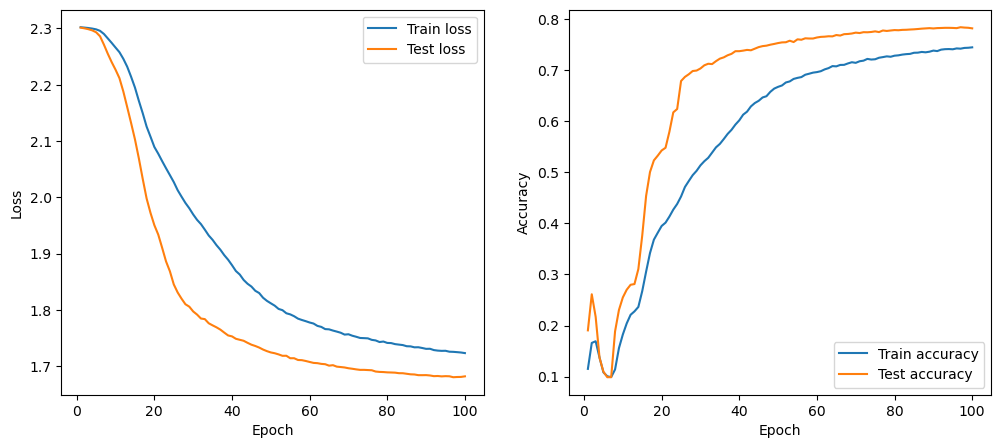

In [28]:
epochs = range(1, len(history["loss_train"]) + 1)
draw_loss_test(epochs, history)

12. Save model and optimizer states to a file.

Use method `state_dict` and function `torch.save`.

In [29]:
model_path = './models/net.pth'
optimizer_path = "./models/optimizer.pth"

torch.save(net.state_dict(), model_path)
torch.save(optimizer.state_dict(), optimizer_path)

In [30]:
model_path2 = "./models/net2.pth"
optimizer_path2 = "./models/optimizer2.pth"

torch.save(net2.state_dict(), model_path2)
torch.save(optimizer2.state_dict(), optimizer_path2)

In [31]:
checkpoint_path = "./checkpoints/checkpoint.pth"

torch.save(
    {
        "model_state_dict": net.state_dict(),
        "optimizer_state_dict": optimizer.state_dict(),
    },
    checkpoint_path,
)

In [32]:
checkpoint_path2 = "./checkpoints/checkpoint2.pth"

torch.save(
    {
        "model_state_dict": net2.state_dict(),
        "optimizer_state_dict": optimizer2.state_dict(),
    },
    checkpoint_path2,
)

13. Create new network with the same architecture and initialize it with saved weights. Compare evaluations for both networks.

Use `torch.load` and `load_state_dict`.

In [33]:
net3 = MLP(input_shape, output_size)
optimizer3 = torch.optim.SGD(net2.parameters(), lr=0.01)

net3.load_state_dict(torch.load(model_path))
optimizer3.load_state_dict(torch.load(optimizer_path))

/var/folders/0b/brzkvl1j0tn9xzynh5pr39sw0000gn/T/ipykernel_17512/1409746203.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net3.load_state_dict(torch.load(model_path))


In [34]:
checkpoint = torch.load("./checkpoints/checkpoint.pth")
net4 = MLP(input_shape, output_size)
optimizer4 = torch.optim.SGD(net3.parameters(), lr=0.01)

net4.load_state_dict(checkpoint["model_state_dict"])
optimizer4.load_state_dict(checkpoint["optimizer_state_dict"])

net4.to(device)

/var/folders/0b/brzkvl1j0tn9xzynh5pr39sw0000gn/T/ipykernel_17512/47768843.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load("./checkpoints/checkpoi

MLP(
  (model): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=512, bias=True)
    (2): ReLU()
    (3): Linear(in_features=512, out_features=512, bias=True)
    (4): ReLU()
    (5): Linear(in_features=512, out_features=10, bias=True)
    (6): Softmax(dim=1)
  )
)

14. **EXTENSION EXERCISE**

Define your own model and train it.

Try to achieve better results.

You can use different parameters, layers e.g.:
- conv2d
- maxpooling2d
- batch norm 2d
- and more...

Save weights to a file.

In [35]:
import torch
import torch.nn as nn
import torch.optim as optim


class FastCNNModel(nn.Module):

    def __init__(self, input_shape, output_size) -> None:
        super(FastCNNModel, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(
                in_channels=input_shape[0],
                out_channels=16,
                kernel_size=3,
                padding=1,
            ),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(
                in_channels=16, out_channels=32, kernel_size=3, padding=1
            ),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(
                in_channels=32, out_channels=64, kernel_size=3, padding=1
            ),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Flatten(),
            nn.Dropout(0.3),
            nn.Linear(64 * (input_shape[1] // 8) * (input_shape[2] // 8), 128),
            nn.ReLU(),
            nn.Linear(128, output_size),
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.model(x)

In [38]:
my_net = FastCNNModel(input_shape, output_size)
my_net = my_net.to(device)

my_loss_fn = nn.CrossEntropyLoss()
my_optimizer = optim.SGD(my_net.parameters(), lr=0.01, momentum=0.9)

In [39]:
my_net, my_history = test_or_train(
    my_net,
    train_loader,
    test_loader,
    my_loss_fn,
    metric,
    my_optimizer,
    mode="both",
    update_period=5,
    epoch_max=100,
    device=device,
    early_stopping_accuracy=0.98,
)

Epoch: 1/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 169.21it/s, accuracy=0.9783, loss=0.0637]


Epoch: 2/100


100%|██████████████████████████████| 157/157 [00:01<00:00, 134.75it/s, accuracy=0.9860, loss=0.0429]


Epoch: 3/100


100%|██████████████████████████████| 157/157 [00:01<00:00, 140.04it/s, accuracy=0.9883, loss=0.0335]


Epoch: 4/100


100%|██████████████████████████████| 157/157 [00:01<00:00, 147.58it/s, accuracy=0.9892, loss=0.0292]


Epoch: 5/100


100%|██████████████████████████████| 157/157 [00:01<00:00, 140.32it/s, accuracy=0.9881, loss=0.0357]


Epoch: 6/100


100%|██████████████████████████████| 157/157 [00:01<00:00, 147.13it/s, accuracy=0.9887, loss=0.0346]


Epoch: 7/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 157.42it/s, accuracy=0.9888, loss=0.0337]


Epoch: 8/100


100%|██████████████████████████████| 157/157 [00:01<00:00, 145.98it/s, accuracy=0.9925, loss=0.0246]


Epoch: 9/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 181.97it/s, accuracy=0.9913, loss=0.0263]


Epoch: 10/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 191.42it/s, accuracy=0.9921, loss=0.0241]


Epoch: 11/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 185.16it/s, accuracy=0.9924, loss=0.0248]

Training accuracy of 0.9803 achieved, stopping training.


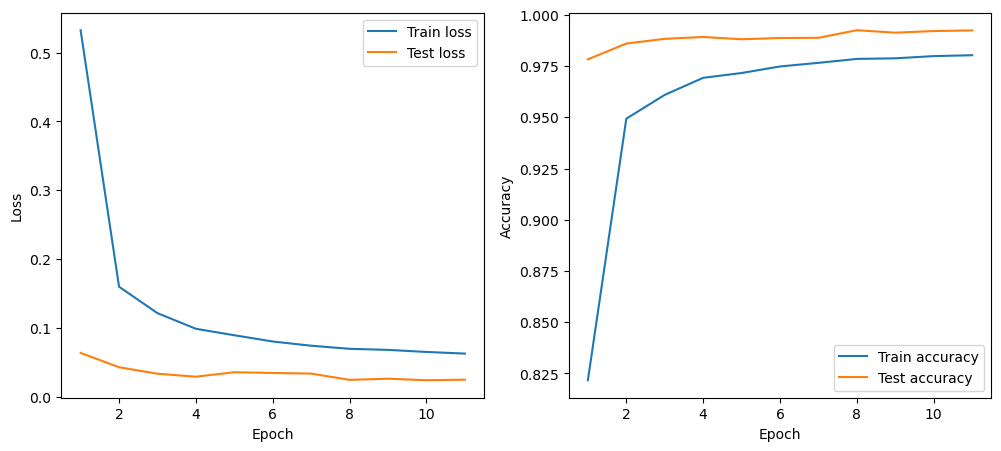

In [40]:
my_epochs = range(1, len(my_history["loss_train"]) + 1)
draw_loss_test(my_epochs, my_history)

In [41]:
class SimpleFastCNNModel(nn.Module):

    def __init__(self, input_shape, output_size) -> None:
        super(SimpleFastCNNModel, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(
                in_channels=input_shape[0],
                out_channels=8,
                kernel_size=3,
                padding=1,
            ),
            nn.BatchNorm2d(8),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(
                in_channels=8, out_channels=16, kernel_size=3, padding=1
            ),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.AdaptiveAvgPool2d(1),
            nn.Flatten(),
            nn.Linear(16, output_size),
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.model(x)

In [45]:
my_net2 = SimpleFastCNNModel(input_shape, output_size)
my_net2 = my_net2.to(device)

my_loss_fn2 = nn.CrossEntropyLoss()
my_optimizer2 = optim.SGD(my_net2.parameters(), lr=0.01, momentum=0.9)

In [46]:
my_net2, my_history2 = test_or_train(
    my_net2,
    train_loader,
    test_loader,
    my_loss_fn2,
    metric,
    my_optimizer2,
    mode="both",
    update_period=5,
    epoch_max=100,
    device=device,
    early_stopping_accuracy=0.98,
)

Epoch: 1/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 291.11it/s, accuracy=0.6191, loss=1.2049]


Epoch: 2/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 286.25it/s, accuracy=0.7627, loss=0.7199]


Epoch: 3/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 284.97it/s, accuracy=0.7657, loss=0.6997]


Epoch: 4/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 268.17it/s, accuracy=0.8615, loss=0.4619]


Epoch: 5/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 274.58it/s, accuracy=0.8783, loss=0.4097]


Epoch: 6/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 277.01it/s, accuracy=0.9102, loss=0.3242]


Epoch: 7/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 285.39it/s, accuracy=0.8951, loss=0.3536]


Epoch: 8/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 287.09it/s, accuracy=0.8962, loss=0.3302]


Epoch: 9/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 283.92it/s, accuracy=0.9130, loss=0.2996]


Epoch: 10/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 285.38it/s, accuracy=0.9286, loss=0.2466]


Epoch: 11/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 290.86it/s, accuracy=0.9125, loss=0.2946]


Epoch: 12/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 286.46it/s, accuracy=0.9172, loss=0.2728]


Epoch: 13/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 289.21it/s, accuracy=0.9283, loss=0.2346]


Epoch: 14/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 287.19it/s, accuracy=0.9288, loss=0.2365]


Epoch: 15/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 264.25it/s, accuracy=0.9336, loss=0.2269]


Epoch: 16/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 265.41it/s, accuracy=0.9332, loss=0.2297]


Epoch: 17/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 279.61it/s, accuracy=0.9403, loss=0.2047]


Epoch: 18/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 289.79it/s, accuracy=0.9318, loss=0.2331]


Epoch: 19/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 290.81it/s, accuracy=0.9371, loss=0.2140]


Epoch: 20/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 290.61it/s, accuracy=0.9316, loss=0.2264]


Epoch: 21/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 286.85it/s, accuracy=0.9344, loss=0.2143]


Epoch: 22/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 290.39it/s, accuracy=0.9379, loss=0.2173]


Epoch: 23/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 277.56it/s, accuracy=0.9457, loss=0.1908]


Epoch: 24/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 279.19it/s, accuracy=0.9342, loss=0.2181]


Epoch: 25/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 295.19it/s, accuracy=0.9448, loss=0.1879]


Epoch: 26/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 238.36it/s, accuracy=0.9498, loss=0.1875]


Epoch: 27/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 280.33it/s, accuracy=0.9408, loss=0.1947]


Epoch: 28/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 266.86it/s, accuracy=0.9455, loss=0.1863]


Epoch: 29/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 228.04it/s, accuracy=0.9473, loss=0.1765]


Epoch: 30/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 272.28it/s, accuracy=0.9401, loss=0.1966]


Epoch: 31/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 275.49it/s, accuracy=0.9487, loss=0.1775]


Epoch: 32/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 271.62it/s, accuracy=0.9476, loss=0.1753]


Epoch: 33/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 261.39it/s, accuracy=0.9442, loss=0.1904]


Epoch: 34/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 280.07it/s, accuracy=0.9366, loss=0.2017]


Epoch: 35/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 279.04it/s, accuracy=0.9470, loss=0.1807]


Epoch: 36/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 278.18it/s, accuracy=0.9395, loss=0.1869]


Epoch: 37/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 261.12it/s, accuracy=0.9395, loss=0.1987]


Epoch: 38/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 267.94it/s, accuracy=0.9444, loss=0.1877]


Epoch: 39/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 262.59it/s, accuracy=0.9442, loss=0.1802]


Epoch: 40/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 270.84it/s, accuracy=0.9515, loss=0.1634]


Epoch: 41/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 268.06it/s, accuracy=0.9503, loss=0.1633]


Epoch: 42/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 279.08it/s, accuracy=0.9545, loss=0.1551]


Epoch: 43/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 276.27it/s, accuracy=0.9538, loss=0.1607]


Epoch: 44/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 285.40it/s, accuracy=0.9495, loss=0.1726]


Epoch: 45/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 284.83it/s, accuracy=0.9443, loss=0.1797]


Epoch: 46/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 283.83it/s, accuracy=0.9464, loss=0.1765]


Epoch: 47/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 256.36it/s, accuracy=0.9498, loss=0.1664]


Epoch: 48/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 269.65it/s, accuracy=0.9518, loss=0.1637]


Epoch: 49/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 272.37it/s, accuracy=0.9447, loss=0.1825]


Epoch: 50/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 275.05it/s, accuracy=0.9492, loss=0.1633]


Epoch: 51/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 274.05it/s, accuracy=0.9496, loss=0.1666]


Epoch: 52/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 279.13it/s, accuracy=0.9498, loss=0.1651]


Epoch: 53/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 265.18it/s, accuracy=0.9549, loss=0.1522]


Epoch: 54/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 269.68it/s, accuracy=0.9501, loss=0.1656]


Epoch: 55/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 273.85it/s, accuracy=0.9552, loss=0.1503]


Epoch: 56/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 277.04it/s, accuracy=0.9497, loss=0.1705]


Epoch: 57/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 279.15it/s, accuracy=0.9550, loss=0.1505]


Epoch: 58/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 281.63it/s, accuracy=0.9516, loss=0.1548]


Epoch: 59/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 278.30it/s, accuracy=0.9539, loss=0.1544]


Epoch: 60/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 284.80it/s, accuracy=0.9538, loss=0.1531]


Epoch: 61/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 284.22it/s, accuracy=0.9558, loss=0.1523]


Epoch: 62/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 279.15it/s, accuracy=0.9558, loss=0.1474]


Epoch: 63/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 282.57it/s, accuracy=0.9504, loss=0.1637]


Epoch: 64/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 279.58it/s, accuracy=0.9531, loss=0.1521]


Epoch: 65/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 275.35it/s, accuracy=0.9518, loss=0.1575]


Epoch: 66/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 263.34it/s, accuracy=0.9586, loss=0.1440]


Epoch: 67/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 252.24it/s, accuracy=0.9519, loss=0.1524]


Epoch: 68/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 307.49it/s, accuracy=0.9568, loss=0.1405]


Epoch: 69/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 313.86it/s, accuracy=0.9509, loss=0.1619]


Epoch: 70/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 248.83it/s, accuracy=0.9503, loss=0.1581]


Epoch: 71/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 306.41it/s, accuracy=0.9576, loss=0.1441]


Epoch: 72/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 305.95it/s, accuracy=0.9552, loss=0.1471]


Epoch: 73/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 301.92it/s, accuracy=0.9552, loss=0.1468]


Epoch: 74/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 296.90it/s, accuracy=0.9590, loss=0.1391]


Epoch: 75/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 288.42it/s, accuracy=0.9587, loss=0.1356]


Epoch: 76/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 271.31it/s, accuracy=0.9547, loss=0.1466]


Epoch: 77/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 279.63it/s, accuracy=0.9579, loss=0.1417]


Epoch: 78/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 308.48it/s, accuracy=0.9563, loss=0.1487]


Epoch: 79/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 317.58it/s, accuracy=0.9508, loss=0.1600]


Epoch: 80/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 297.17it/s, accuracy=0.9536, loss=0.1526]


Epoch: 81/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 289.99it/s, accuracy=0.9576, loss=0.1396]


Epoch: 82/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 281.37it/s, accuracy=0.9523, loss=0.1561]


Epoch: 83/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 291.67it/s, accuracy=0.9577, loss=0.1429]


Epoch: 84/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 321.60it/s, accuracy=0.9603, loss=0.1345]


Epoch: 85/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 297.64it/s, accuracy=0.9544, loss=0.1461]


Epoch: 86/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 318.20it/s, accuracy=0.9548, loss=0.1464]


Epoch: 87/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 278.65it/s, accuracy=0.9566, loss=0.1394]


Epoch: 88/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 284.68it/s, accuracy=0.9606, loss=0.1341]


Epoch: 89/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 307.35it/s, accuracy=0.9598, loss=0.1373]


Epoch: 90/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 320.00it/s, accuracy=0.9595, loss=0.1363]


Epoch: 91/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 296.37it/s, accuracy=0.9585, loss=0.1366]


Epoch: 92/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 296.85it/s, accuracy=0.9590, loss=0.1372]


Epoch: 93/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 290.85it/s, accuracy=0.9588, loss=0.1363]


Epoch: 94/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 313.59it/s, accuracy=0.9602, loss=0.1311]


Epoch: 95/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 277.52it/s, accuracy=0.9570, loss=0.1383]


Epoch: 96/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 277.87it/s, accuracy=0.9596, loss=0.1384]


Epoch: 97/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 278.94it/s, accuracy=0.9585, loss=0.1373]


Epoch: 98/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 280.35it/s, accuracy=0.9610, loss=0.1310]


Epoch: 99/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 277.88it/s, accuracy=0.9619, loss=0.1326]


Epoch: 100/100


100%|██████████████████████████████| 157/157 [00:00<00:00, 269.36it/s, accuracy=0.9606, loss=0.1290]


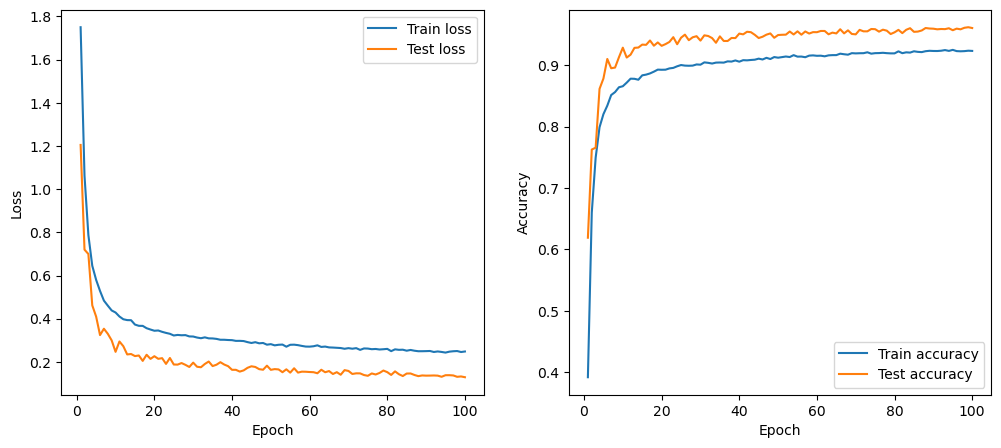

In [47]:
my_epochs2 = range(1, len(my_history2["loss_train"]) + 1)
draw_loss_test(my_epochs2, my_history2)